# Re-doing the Iris analysis - Using a Naive Bayes Classifier

## Introduction

In this notebook I will re-do the Iris data analysis using a naive Bayes classifier. I will collect pieces and snippets from our [textbook](http://bit.ly/2xoFamE) and combine them in my own classification of the Iris data set using a naive Bayes classifier.

I will setup the analysis using the generic Scikit-Learn steps as explained in the book. I will explain each step in a markdown cell, using my own words.

## Research question

Is it possible to predict the species if you only have information about the petal? Or could the information about the sepals be more important to predict the type of the iris?

## Analysis
The aim is to find out whether information about petals or sepals is more important to identify a flower for its iris species

### 1. load the iris data set (see Introducing Scikit-Learn)
[_describe briefly what your data set is about and where you get the data from_]

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

iris = datasets.load_iris()

### 2. create a feature matrix X and a target array y from the data set
[_describe how you are going to prepare the data set and for what reason_]

In [3]:
Xpetal = iris.data[:, 2:4] # [All Rows, Includes Column 2: Excludes Column 4] Just Petal is selected
ypetal = iris.target #=species
#y is not affected by slicing X because the result belongs to a row, number of rows is not decreased


Xsepal = iris.data[:,:2] # [All Rows, rom column 0: Excludes column 2] Just Sepal is selected
ysepal = iris.target #=species
#y is not affected by slicing X because the result belongs to a row, number of rows is not decreased

### 3. split the data in a test and train set
[_describe how you are going to split the data set and for what reason_]

In [4]:
from sklearn.cross_validation import train_test_split

#A Test Set size of 0.1 leads to the highest accuracy of petal data(0.53)
#A Test Set size of 0.3 leads to the highest accuracy of sepal data(0.77)


#
Xpetal_learn, Xpetal_test, ypetal_learn, ypetal_test = train_test_split(Xpetal, ypetal, test_size=0.05, random_state = 0); #Size of trainingset = 85% of whole dataset



Xsepal_learn, Xsepal_test, ysepal_learn, ysepal_test = train_test_split(Xsepal, ysepal, test_size=0.05, random_state = 0); #Size of trainingset = 85% of whole dataset

### 4. fit the model using the train set, applying the naive Bayes classifier
[_describe how you are going to fit the model and what model parameters you are using_]

In [6]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
models = GaussianNB()


model.fit(Xpetal, ypetal);



models.fit(Xsepal, ysepal);

### 5. evaluate the model by predicting the test set
[_describe how you are going to evaluate the results of your classifier and what it means_]

[2 1 0 2 0 2 0 1]
[2 1 0 2 0 2 0 1]
Accuracy of prediction with petal is:  1.0


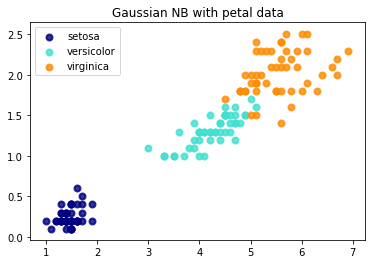

[1 1 0 2 0 2 0 2]
[2 1 0 2 0 2 0 1]
Accuracy of prediction with petal is:  0.75


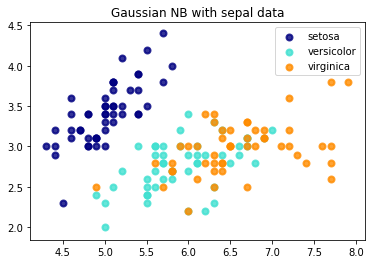

In [7]:
from sklearn.metrics import accuracy_score



resultPetal = model.predict(Xpetal_test)
print(resultPetal)
print(ypetal_test)


print("Accuracy of prediction with petal is: ", accuracy_score(ypetal_test, resultPetal))

target_names = iris.target_names
plt.figure()
plt.title("Gaussian NB with petal data")
colors = ['navy', 'turquoise', 'darkorange']
lw = 2
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(Xpetal[ypetal == i, 0], Xpetal[ypetal == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)

plt.show();


resultSepal = models.predict(Xsepal_test)
print(resultSepal)
print(ysepal_test)


print("Accuracy of prediction with petal is: ", accuracy_score(ysepal_test, resultSepal))

target_names = iris.target_names
plt.figure()
plt.title("Gaussian NB with sepal data")
colors = ['navy', 'turquoise', 'darkorange']
lw = 2
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(Xsepal[ysepal == i, 0], Xsepal[ysepal == i, 1], color=color, alpha=.8, lw=lw,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)

plt.show();

## Discussion of result
With 10% test data, the petal data achieves the highest accuracy of 53% correct answers. With 30% test data, sepals achieve the highest accuracy of 77% correct answers. With 53% of the correct answers as the highest accuracy, the petal data are not meaningful enough to predict the species. This leads to the assumption that calyx data is the better choice for predicting the type of iris.

Interesting is the fact that the data in the graphs do not lead to the same assumption as the accuracy. By simply evaluating the graphs, it should be easier to separate the three species with petal data, and therefore the prediction with petal data should be more accurate.

## Comparison of classifiers
SVM: The best way to predict the species (80% accuracy) is with help of sepal data and 70% train set. NB: The best way to predict the species (77% accuracy) is with sepal data and 70% train set. Bias and variance are already taken into account when fine-tuning the highest accuracy in each model. As you can see, SVM is more accurate than NL with the same amount of training data. This leads to the assumption that SVM is the better choice for the iris dataset.